In [1]:
import pandas as pd

df = pd.read_csv('mushroom_encoded.csv')
df.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,p
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,e
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,e


In [2]:
from sklearn.preprocessing import LabelEncoder
X= df.drop('class', axis=1)
y = df['class']
le = LabelEncoder()
y = le.fit_transform(y)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
acc= accuracy_score(y_test, y_pred,)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {round(acc,2)}")
print(f"Precision: {round(prec,2)}")
print(f"Recall: {round(rec,2)}")
print(f"F1 Score: {round(f1,2)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.74
Precision: 0.73
Recall: 0.66
F1 Score: 0.69
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2873
           1       0.73      0.66      0.69      2325

    accuracy                           0.74      5198
   macro avg       0.74      0.73      0.73      5198
weighted avg       0.74      0.74      0.73      5198



In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [ 0.001,0.01,0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


grid_search = GridSearchCV(LogisticRegression(solver = 'liblinear'), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Model:", best_model)
print("Best Parameters:", best_params)

Best Model: LogisticRegression(C=0.01, solver='liblinear')
Best Parameters: {'C': 0.01, 'penalty': 'l2'}


In [7]:
# Use the best model to make predictions on the test set
y_pred = best_model.predict(X_test)
acc= accuracy_score(y_test, y_pred,)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print
print(f"Accuracy: {round(acc,2)}")
print(f"Precision: {round(prec,2)}")
print(f"Recall: {round(rec,2)}")
print(f"F1 Score: {round(f1,2)}")

Accuracy: 0.74
Precision: 0.73
Recall: 0.66
F1 Score: 0.69


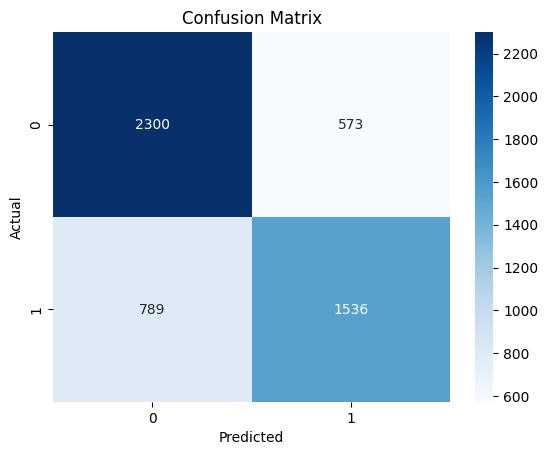

In [8]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
import joblib

joblib.dump(best_model, 'log_model.joblib')

['log_model.joblib']

In [10]:
y

array([0, 1, 0, ..., 1, 0, 0])